# Introduction: Enhancing Lead Conversion for Business Growth

In today's dynamic business landscape, where every interaction counts, the ability to convert potential leads into loyal customers is the cornerstone of success. This project dives deep into the realm of lead conversion prediction, armed with a rich dataset that encompasses lead interactions and outcomes. Our mission is to decipher the intricate factors that influence lead conversion.

The dataset has unveiled a treasure trove of insights, shedding light on lead behavior, engagement patterns, and, most crucially, the probability of conversion. Leveraging advanced data analysis and machine learning techniques, we've developed a predictive model capable of distinguishing promising leads from those less likely to convert.



Our overarching goal is clear: to equip businesses with actionable intelligence to optimize lead management strategies, allocate resources more efficiently, and ultimately, fuel business growth. In the following sections, we will unveil our project's discoveries, methodologies, and recommendations, offering a roadmap to harness data-driven decisions and supercharge lead conversion rates.

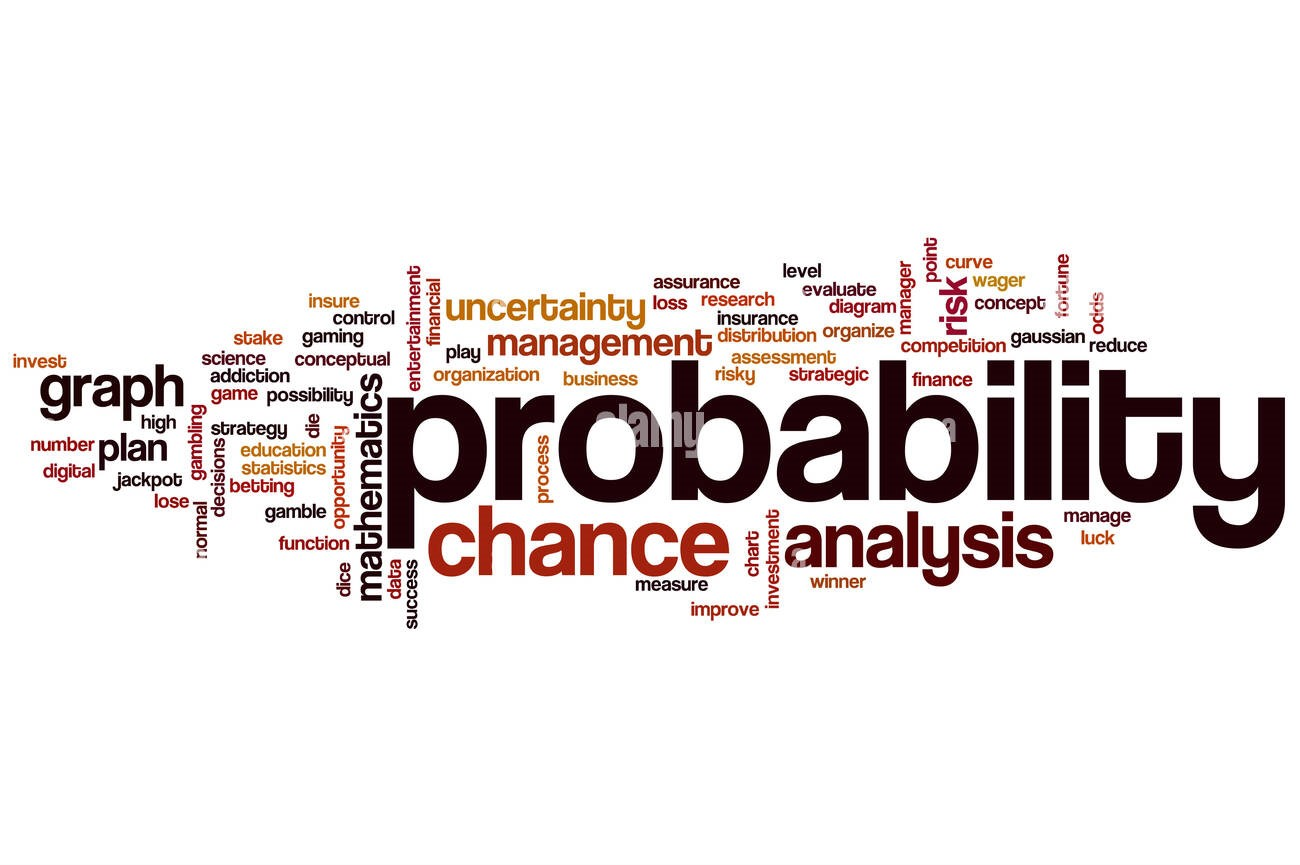

In [ ]:
# Important Variables	Description
# Prospect ID	A unique ID with which the customer is identified.
# Lead Origin	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
# Lead Source	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
# Converted	The target variable. Indicates whether a lead has been successfully converted or not.
# Time Spent on Website	The total time spent by the customer on the website.
# Last Activity	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
# Specialization	The industry domain in which the customer worked before. Includes the level ‘Select Specialization’, meaning the customer had not selected this option while filling out the form.
# What is your current occupation	Indicates whether the customer is a student, unemployed or employed.
# City	The city of the customer.

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
df = pd.DataFrame(pd.read_csv('Targeting_right_customer.csv'))
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [ ]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
# Missing value

In [ ]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [ ]:
high_null=df.isnull().sum()/len(df)

In [ ]:
high_null.sort_values(ascending=False)

Lead Quality                                     0.515909
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Index                       0.456494
Tags                                             0.362879
Lead Profile                                     0.293182
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

In [ ]:
# Asymmetrique Activity Index                      0.456494
# Asymmetrique Profile Score                       0.456494
# Asymmetrique Activity Score                      0.456494
# Asymmetrique Profile Index                       0.456494

# an index and score has been assigned to each customer based on the form evaluation

In [ ]:
df.drop(["Asymmetrique Activity Index","Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index"],axis=1,inplace=True)

In [ ]:
df.shape

(9240, 33)

In [ ]:
# No of unique variables

In [ ]:
for i in df.select_dtypes("O").columns:
  print(i)
  print(df[i].unique())

Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email
['No' 'Yes']
Do Not Call
['No' 'Yes']
Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Vi

In [ ]:
df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [ ]:
df.shape

(9240, 31)

In [ ]:
df.replace("Select",np.nan,inplace=True)

In [ ]:
df.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,No,No,Email Opened


In [ ]:
# Exploratory Data Analysis

In [ ]:
df["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [ ]:
df["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [ ]:
# Lets make a Bar plot

In [ ]:
lead_data=df["Lead Quality"].value_counts().reset_index()

<Axes: xlabel='Lead Quality', ylabel='count'>

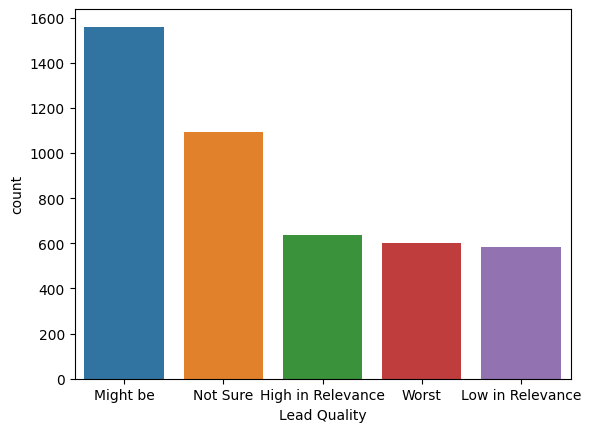

In [ ]:
lead_data.columns=["Lead Quality","count"]

sns.barplot(x="Lead Quality",y="count",data=lead_data)

In [ ]:
df["Lead Quality"].isnull().sum()

4767

In [ ]:
# we are not sure about the client  lead quality and we should handle the missing values with not sure

In [ ]:
df["Lead Quality"]=df["Lead Quality"].replace(np.nan,"Not Sure")

In [ ]:
df["Lead Quality"].isnull().sum()

0

In [ ]:
# EDA of Country

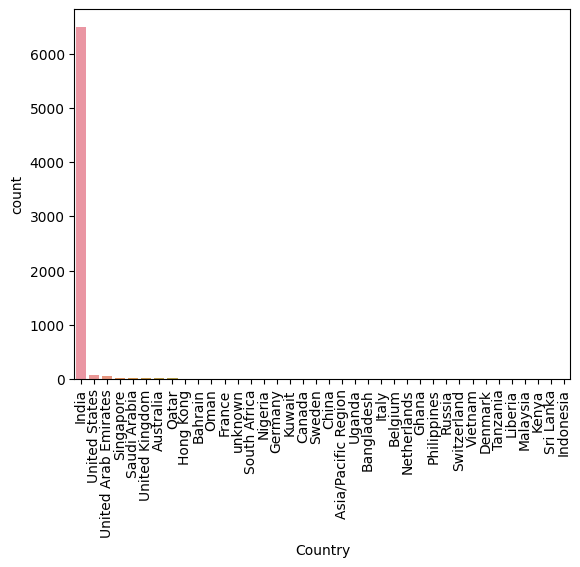

In [ ]:
lead_data=df["Country"].value_counts().reset_index()
lead_data.columns=["Country","count"]
xticks(rotation=90)
sns.barplot(x="Country",y="count",data=lead_data)
plt.show()

In [ ]:
df["Country"].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [ ]:
df.drop("Country",axis=1,inplace=True)

In [ ]:
df.shape

(9240, 30)

In [ ]:
# The country column has 95% data from India

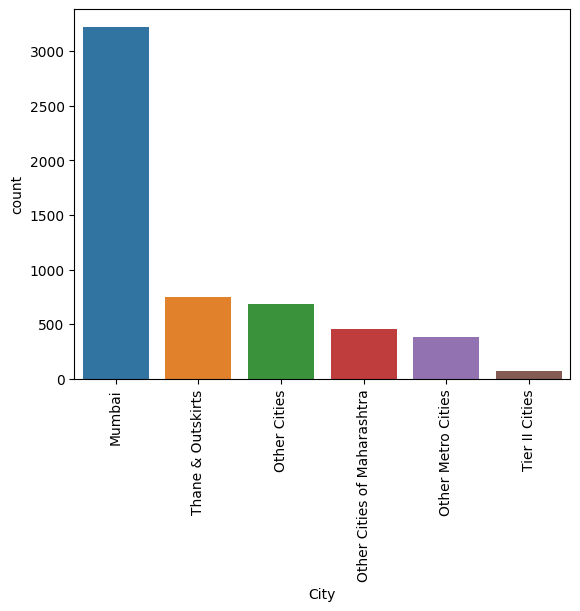

In [ ]:
lead_data=df["City"].value_counts().reset_index()
lead_data.columns=["City","count"]
xticks(rotation=90)
sns.barplot(x="City",y="count",data=lead_data)
plt.show()

In [ ]:
df["City"].isnull().sum()

3669

In [ ]:
df["City"]=df["City"].replace(np.nan,"Mumbai")

In [ ]:
df["City"].isnull().sum()

0

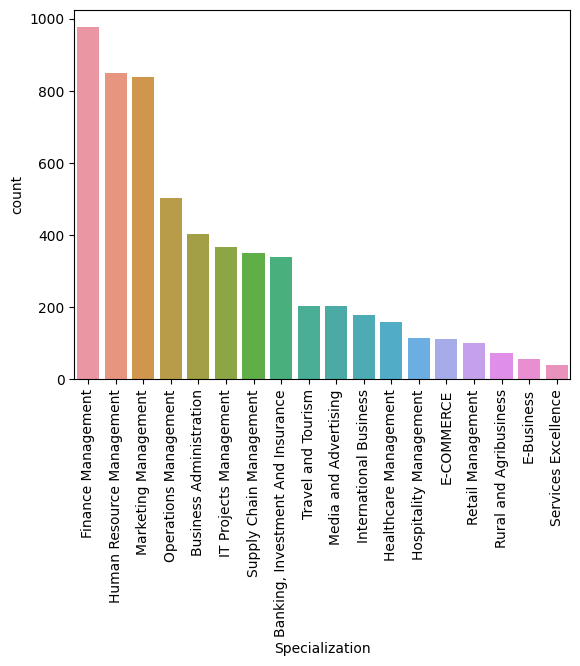

In [ ]:
lead_data=df["Specialization"].value_counts().reset_index()
lead_data.columns=["Specialization","count"]
xticks(rotation=90)
sns.barplot(x="Specialization",y="count",data=lead_data)
plt.show()

In [ ]:
df["Specialization"]=df["Specialization"].replace(np.nan,"Others")

In [ ]:
df["Specialization"].isnull().sum()

0

In [ ]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [ ]:
high_null1=df.isnull().sum()/len(df)
high_null1.sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Lead Origin                                      0.000000
Lead Quality                                     0.000000
Update me on Supply Chain Content                0.000000
Get updates on DM Content                        0.000000
Through Recommendations                          0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
Receive More U

In [ ]:
high_missing=high_null1[high_null1>0.70].index

In [ ]:
high_missing

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [ ]:
df=df.drop(high_missing,axis=1)

In [ ]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

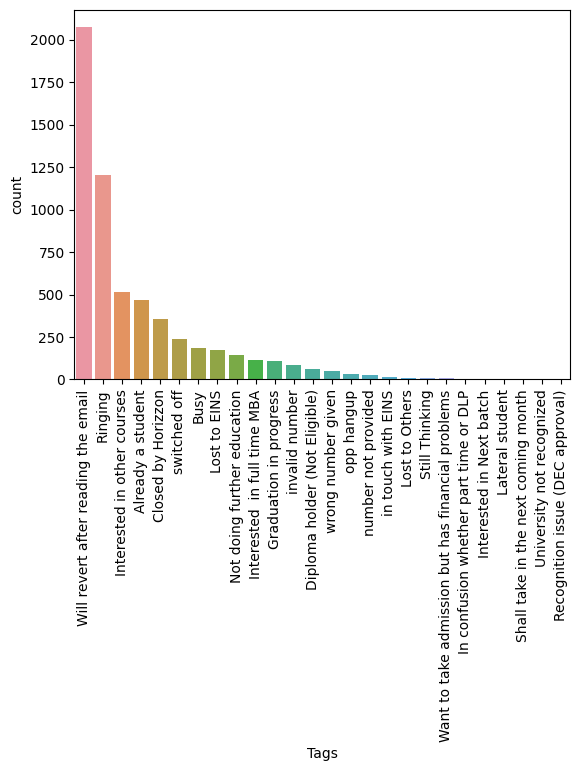

In [ ]:
lead_data=df["Tags"].value_counts().reset_index()
lead_data.columns=["Tags","count"]
xticks(rotation=90)
sns.barplot(x="Tags",y="count",data=lead_data)
plt.show()

In [ ]:
df["Tags"].isnull().sum()

3353

In [ ]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [ ]:
df["Tags"]=df["Tags"].replace(np.nan,"No comments")

In [ ]:
df["Tags"].isnull().sum()

0

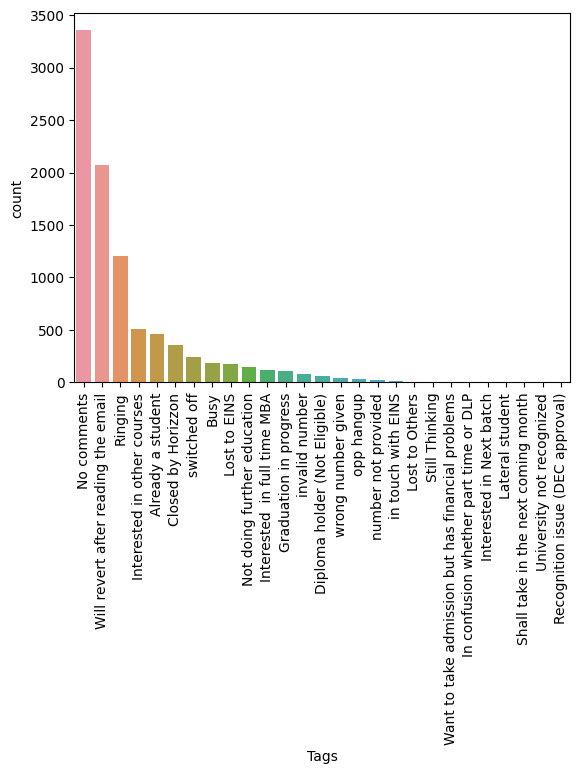

In [ ]:
lead_data=df["Tags"].value_counts().reset_index()
lead_data.columns=["Tags","count"]
xticks(rotation=90)
sns.barplot(x="Tags",y="count",data=lead_data)
plt.show()

In [ ]:
df["Tags"].isnull().sum()

0

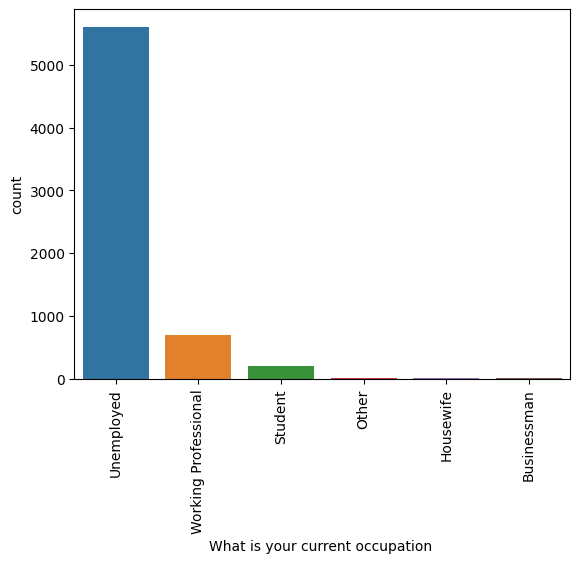

In [ ]:
lead_data=df["What is your current occupation"].value_counts().reset_index()
lead_data.columns=["What is your current occupation ","count"]
xticks(rotation=90)
sns.barplot(x="What is your current occupation ",y="count",data=lead_data)
plt.show()

In [ ]:
df["What is your current occupation"]=df["What is your current occupation"].replace(np.nan,"other")

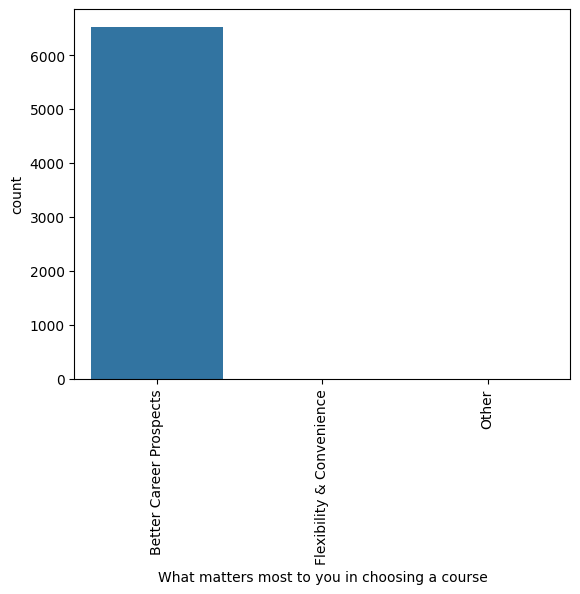

In [ ]:
lead_data=df["What matters most to you in choosing a course"].value_counts().reset_index()
lead_data.columns=["What matters most to you in choosing a course","count"]
xticks(rotation=90)
sns.barplot(x="What matters most to you in choosing a course",y="count",data=lead_data)
plt.show()

In [ ]:
df["What matters most to you in choosing a course"]=df["What matters most to you in choosing a course"].replace(np.nan,"other")

In [ ]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                       

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Specialization                                 9074 

In [ ]:
df["Converted"].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [ ]:
# Balanced dataset

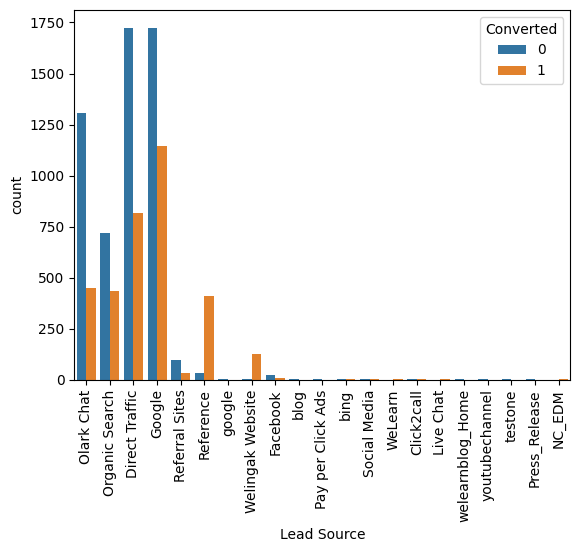

In [ ]:
sns.countplot(x="Lead Source",hue="Converted",data=df)
xticks(rotation=90)
plt.show()

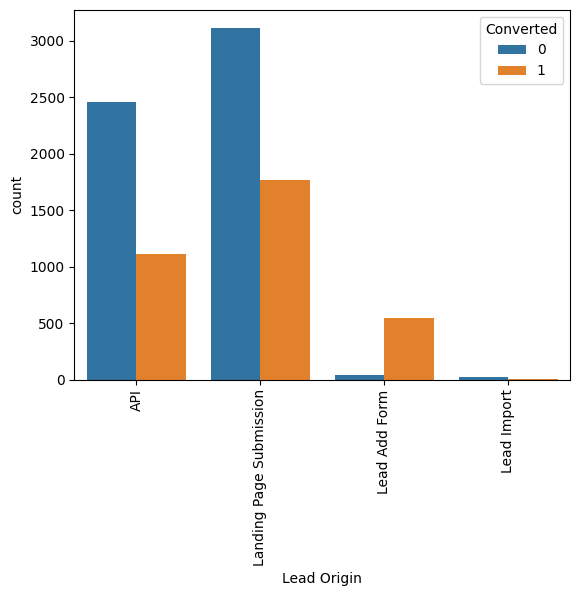

In [ ]:
sns.countplot(x="Lead Origin",hue="Converted",data=df)
xticks(rotation=90)
plt.show()

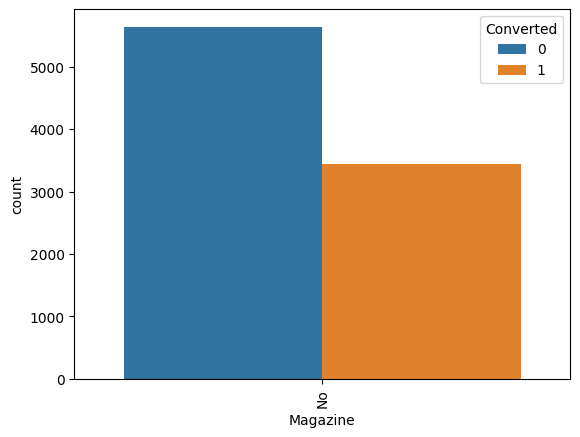

In [ ]:
sns.countplot(x="Magazine",hue="Converted",data=df)
xticks(rotation=90)
plt.show()

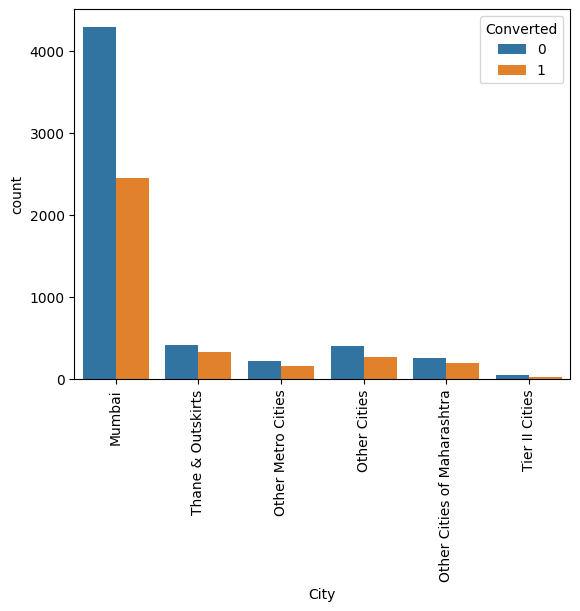

In [ ]:
sns.countplot(x="City",hue="Converted",data=df)
xticks(rotation=90)
plt.show()

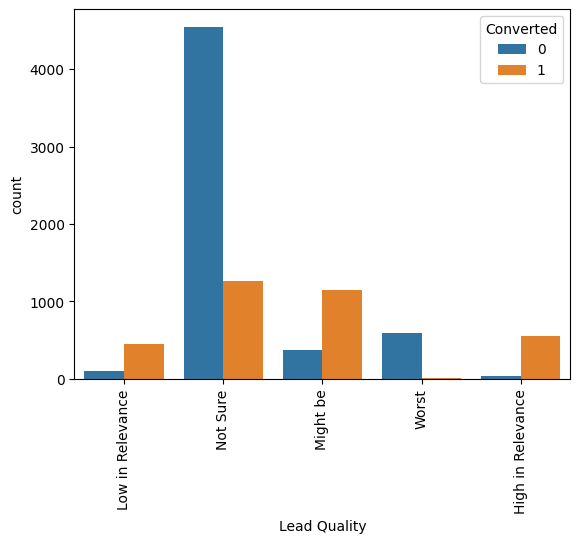

In [ ]:
sns.countplot(x="Lead Quality",hue="Converted",data=df)
xticks(rotation=90)
plt.show()

In [ ]:
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


<Axes: >

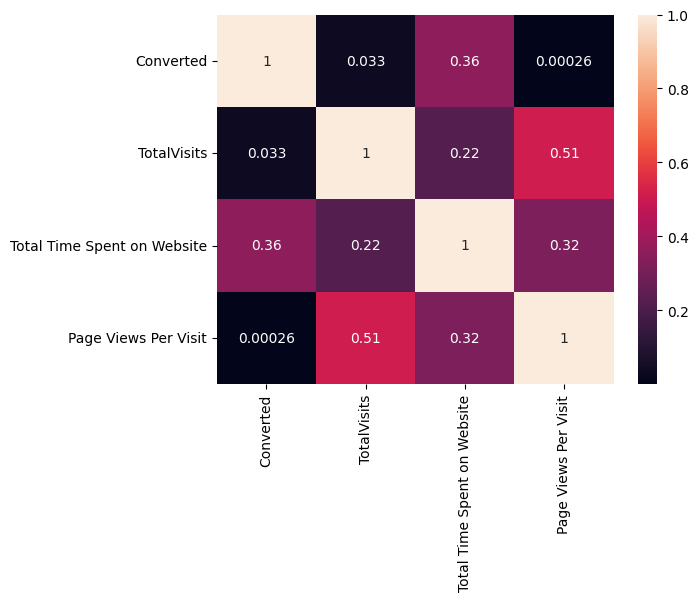

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened


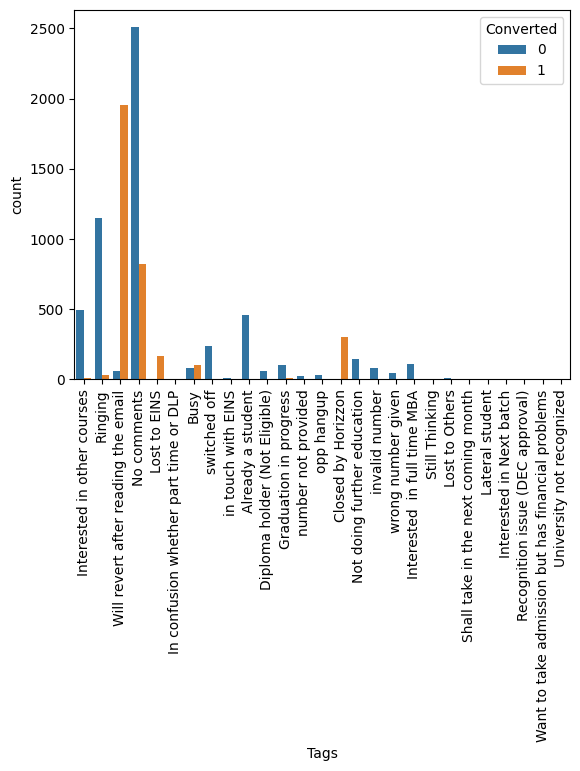

In [ ]:
sns.countplot(x="Tags",hue="Converted",data=df)
xticks(rotation=90)
plt.show()

In [ ]:
df["Tags"].value_counts()

No comments                                          3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

In [ ]:
df1=df.copy()

In [ ]:
df1["Tags"]=df1["Tags"].replace(["invalid number","Diploma holder (Not Eligible)","wrong number given",
                                       "opp hangup","number not provided","in touch with EINS","Lost to Others",
                                       "Still Thinking","Want to take admission but has financial problems",
                                       "In confusion whether part time or DLP","Interested in Next batch",
                                       "Lateral student","Shall take in the next coming month",
                                       "University not recognized","Recognition issue (DEC approval)",
                                       "Graduation in progress"],"OTHER_COMMENT")

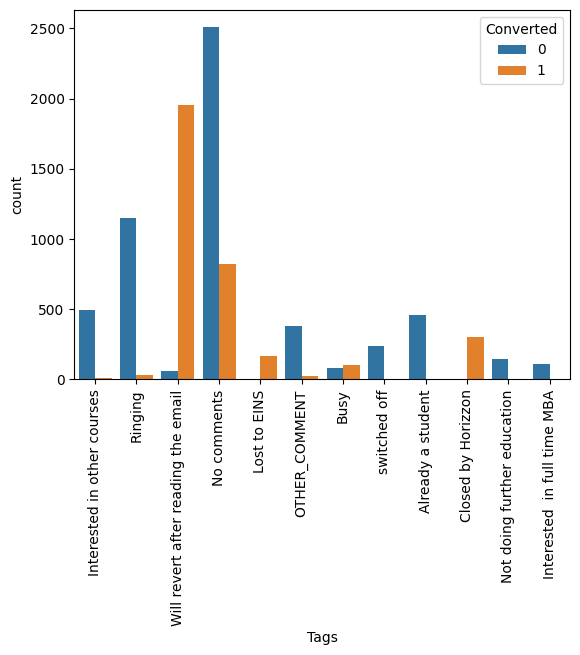

In [ ]:
sns.countplot(x="Tags",hue="Converted",data=df1)
xticks(rotation=90)
plt.show()

In [ ]:
df1.shape

(9074, 28)

In [ ]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [ ]:
# Value count function to find univariant columns

In [ ]:
# Value_count_function_to find univariant columns
for i in df1.select_dtypes("O").columns:
  print("############### \n")
  print(i)
  print("\n")
  print(df1[i].value_counts())

############### 

Lead Origin


Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
############### 

Lead Source


Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
############### 

Do Not Email


No     8358
Yes     716
Name: Do Not Email, dtype: int64
############### 

Do Not Call


No     9072
Yes       2
Name: Do Not Call, dtype: int64
############### 

La

In [ ]:
df2=df1.drop(["Do Not Call","What matters most to you in choosing a course","Search",
                    "Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                   "Through Recommendations","Receive More Updates About Our Courses",
                   "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
                   ],axis=1)

In [ ]:
df2.shape

(9074, 15)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [ ]:
# map approach
df2["Do Not Email"]=df2["Do Not Email"].map({"Yes":1,"No":0})
df2["A free copy of Mastering The Interview"]=df2["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [ ]:
# Lets see the Coorelation Matrix

In [ ]:
corr_matrix=df1.corr(method="spearman")

In [ ]:
corr_matrix

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.041121,0.251282,0.002136
TotalVisits,0.041121,1.000000,0.582502,0.848443
Total Time Spent on Website,0.251282,0.582502,1.000000,0.567886
Page Views Per Visit,0.002136,0.848443,0.567886,1.000000


<Axes: >

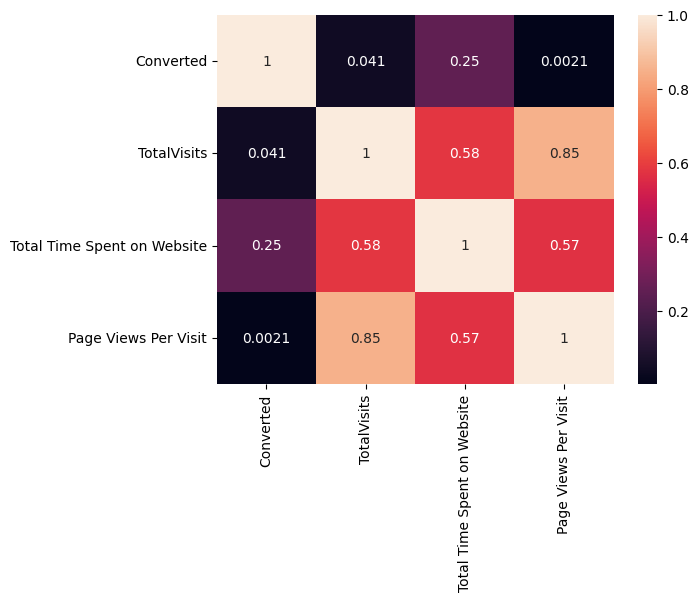

In [ ]:
sns.heatmap(corr_matrix,annot=True)

In [ ]:
# we will apply one hot encoding

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [ ]:
df2=pd.get_dummies(columns=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","Tags","Lead Quality","City","Last Notable Activity"],data=df2,drop_first=True,dtype="float")

In [ ]:
df2.shape

(9074, 104)

In [ ]:
df2.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_other,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No comments,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,5.0,674,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2.0,1532,2.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [ ]:
df2.isnull().sum()

Do Not Email                                          0
Converted                                             0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
                                                     ..
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 104, dtype: int64

In [ ]:
df2.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=104)

In [ ]:
df2=df2.drop(index=0)

In [ ]:
df2.shape

(9073, 104)

In [ ]:
# Model building process

In [ ]:
x=df2.drop(["Converted"],axis=1)

In [ ]:
y=df2["Converted"]

In [ ]:
# scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
x_scaled=x[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(x[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [ ]:
x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_other,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No comments,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0.019920,0.296655,0.045455,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.007968,0.674296,0.036364,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.003984,0.134243,0.018182,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
# splitting the data into training and testing sets

In [ ]:
x_scaled

array([[0.01992032, 0.29665493, 0.04545455],
       [0.00796813, 0.67429577, 0.03636364],
       [0.00398406, 0.13424296, 0.01818182],
       ...,
       [0.00796813, 0.08758803, 0.03636364],
       [0.01195219, 0.21963028, 0.05454545],
       [0.02390438, 0.56294014, 0.05454545]])

In [ ]:
# ols approach

In [ ]:
import statsmodels.api as sm

In [ ]:
x1=sm.add_constant(x)

In [ ]:
x1.head(2)

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_other,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No comments,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,1.0,0,0.019920,0.296655,0.045455,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,0.007968,0.674296,0.036364,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
x_train.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_other,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No comments,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6234,1.0,0,0.019920,0.098151,0.045455,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6770,1.0,0,0.019920,0.456426,0.090909,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5319,1.0,0,0.007968,0.527289,0.036364,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

In [ ]:
# Logistic Regression Model

In [ ]:
log_model=sm.GLM(y_train,x_train,family=sm.families.Binomial())
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7258
Model:                            GLM   Df Residuals:                     7160
Model Family:                Binomial   Df Model:                           97
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.0
Date:                Sun, 03 Sep 2023   Deviance:                       2378.1
Time:                        12:28:59   Pearson chi2:                 1.21e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6318
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8992   1.05e+05  -4.68e-05      1.000   -2.05e+05    2.05e+05
Do Not Email                                            -1.0935      0.330     -3.312      0.001      -1.741      -0.446
TotalVisits                                              2.0269      4.213      0.481      0.630      -6.230      10.284
Total Time Spent on Website                              4.5625      0.267     17.058      0.000       4.038       5.087
Page Views Per Visit                                     0.0795      2.154      0.037      0.971      -4.143       4.302
A free copy of Mastering The Interview                  -0.1425      0.182     -0.782      0.435      -0.500       0.215
Lead Origin_Landing Page Submission                     -0.4100      0.237     -1.732      0.083      -0.874       0.054
Lead Origin_Lead Add Form                               20.9768   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Lead Origin_Lead Import                                  9.6950   2.71e+04      0.000      1.000   -5.32e+04    5.32e+04
Lead Source_Direct Traffic                              19.4328   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Lead Source_Facebook                                     9.6950   2.71e+04      0.000      1.000   -5.32e+04    5.32e+04
Lead Source_Google                                      19.4855   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Lead Source_Live Chat                                   17.5607   4.84e+04      0.000      1.000   -9.48e+04    9.49e+04
Lead Source_NC_EDM                                      44.3502   8.64e+04      0.001      1.000   -1.69e+05    1.69e+05
Lead Source_Olark Chat                                  20.3952   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Lead Source_Organic Search                              19.5313   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Lead Source_Pay per Click Ads                            2.6480   7.95e+04   3.33e-05      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                               -0.0019    9.1e+04  -2.06e-08      1.000   -1.78e+05    1.78e+05
Lead Source_Reference                                   -0.6412      2.733     -0.235      0.815      -5.998       4.715
Lead Source_Referral Sites                              18.9939   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Lead Source_Social Media                                22.0546   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
Lead Source_WeLearn                                     39.0947   1.19e+05      0.000      1.000   -2.34e+05    2.34e+05
Lead Source_Welingak Website                             2

In [ ]:
# Recursssive Feature elimination

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
ref=RFE(logreg,n_features_to_select=15)
rfe=ref.fit(x_train,y_train)

In [ ]:
rfe.support_

array([False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False])

In [ ]:
col=x_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_No comments',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [ ]:
x_train.columns[~rfe.support_]

Index(['const', 'Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted 

In [ ]:
x_train_sm=sm.add_constant(x_train[col])
log_model2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
result=log_model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7258
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1280.6
Date:                Sun, 03 Sep 2023   Deviance:                       2561.1
Time:                        12:29:19   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6224
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1056      0.214    -19.197      0.000      -4.525      -3.686
Total Time Spent on Website                  3.6090      0.220     16.441      0.000       3.179       4.039
Lead Origin_Lead Add Form                    1.0613      0.412      2.574      0.010       0.253       1.869
Lead Source_Welingak Website                 2.2922      0.839      2.731      0.006       0.647       3.937
Last Activity_Had a Phone Conversation       4.7094      1.265      3.723      0.000       2.230       7.189
Last Activity_SMS Sent                       2.1108      0.117     17.982      0.000       1.881       2.341
What is your current occupation_other       -2.6048      0.145    -17.971      0.000      -2.889      -2.321
Tags_Busy                                    2.4165      0.278      8.687      0.000       1.871       2.962
Tags_Closed by Horizzon                      8.5887      0.760     11.308      0.000       7.100      10.077
Tags_Lost to EINS                            8.8460      0.588     15.045      0.000       7.694       9.998
Tags_No comments                             3.7254      0.228     16.363      0.000       3.279       4.172
Tags_Ringing                                -1.5041      0.281     -5.357      0.000      -2.054      -0.954
Tags_Will revert after reading the email     6.3266      0.253     25.033      0.000       5.831       6.822
Tags_switched off                           -2.2468      0.627     -3.582      0.000      -3.476      -1.018
Lead Quality_Worst                          -2.1058      0.673     -3.129      0.002      -3.425      -0.787
Last Notable Activity_Modified              -1.4480      0.123    -11.801      0.000      -1.688      -1.208
============================================================================================================
"""

In [ ]:
# get the probability Score

In [ ]:
y_train_predict=result.predict(x_train_sm)

In [ ]:
y_train_predict

6234    0.067183
6770    0.780238
5319    0.984077
7946    0.002556
5431    0.138453
          ...   
1960    0.003858
5869    0.406078
8109    0.015785
3165    0.990159
716     0.015299
Length: 7258, dtype: float64

In [ ]:
# sklearn approach

In [ ]:
logreg.fit(x_train_sm,y_train)

LogisticRegression()

In [ ]:
probability_score=logreg.predict_proba(x_train_sm)

In [ ]:
probability_score

array([[0.92380053, 0.07619947],
       [0.25591634, 0.74408366],
       [0.02125793, 0.97874207],
       ...,
       [0.97895615, 0.02104385],
       [0.01355941, 0.98644059],
       [0.97954428, 0.02045572]])

In [ ]:
pos_probability_score=logreg.predict_proba(x_train_sm)[:,1]

In [ ]:
pos_probability_score

array([0.07619947, 0.74408366, 0.97874207, ..., 0.02104385, 0.98644059,
       0.02045572])

In [ ]:
# continue with OLS

In [ ]:
y_train_predict=y_train_predict.values.reshape(-1)

In [ ]:
y_train_predict

array([0.06718256, 0.78023821, 0.98407701, ..., 0.01578478, 0.9901586 ,
       0.01529873])

In [ ]:
# Create a dataframe as per the form we have received

In [ ]:
y_train_predict_final=pd.DataFrame({"Converted":y_train.values,"Converted_prob":y_train_predict})
y_train_predict_final["Customer_ID"]=y_train.index
y_train_predict_final.head(10)

,Converted,Converted_prob,Customer_ID
0,0,0.067183,6234
1,0,0.780238,6770
2,1,0.984077,5319
3,0,0.002556,7946
4,0,0.138453,5431
5,0,0.006590,3529
6,0,0.004687,221
7,0,0.022624,3920
8,0,0.192574,95
9,1,0.768867,6558


In [ ]:
# ROC,AUC Curve

In [ ]:
from sklearn.metrics import roc_curve,precision_recall_curve,f1_score,auc

In [ ]:
fpr,tpr,thresholds_roc=roc_curve(y_train_predict_final.Converted,y_train_predict_final.Converted_prob)

In [ ]:
precision,recall,threshold_pr=precision_recall_curve(y_train_predict_final.Converted,y_train_predict_final.Converted_prob)

In [ ]:
# plot the roc_curve

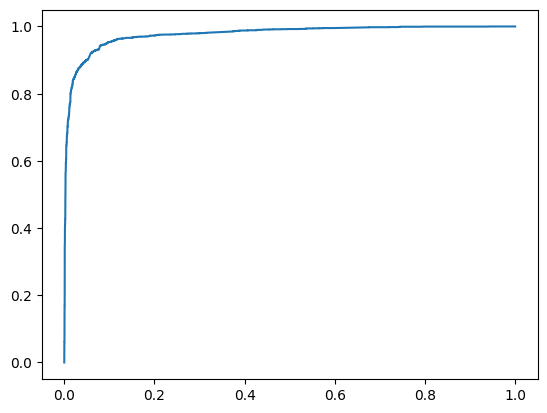

In [ ]:
plt.plot(fpr,tpr,label="Roc Curve(area=%0.2f)"%auc(fpr,tpr))

In [ ]:
# finding the threshold value

In [ ]:
f1_scores=2*(precision*recall)/(precision+recall)
optimal_idx=np.argmax(f1_scores)
optimal_threshold=threshold_pr[optimal_idx]




In [ ]:
optimal_threshold

0.39404757568646703

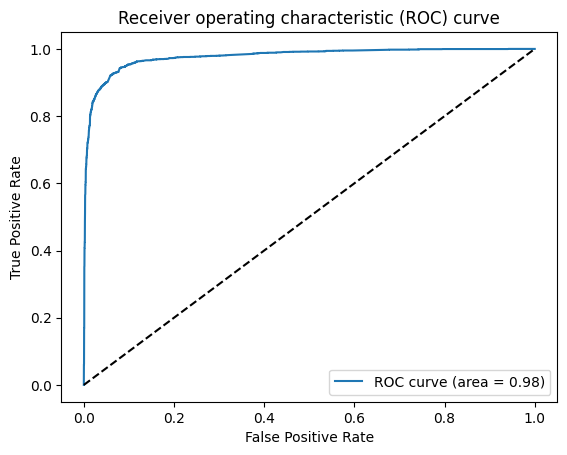

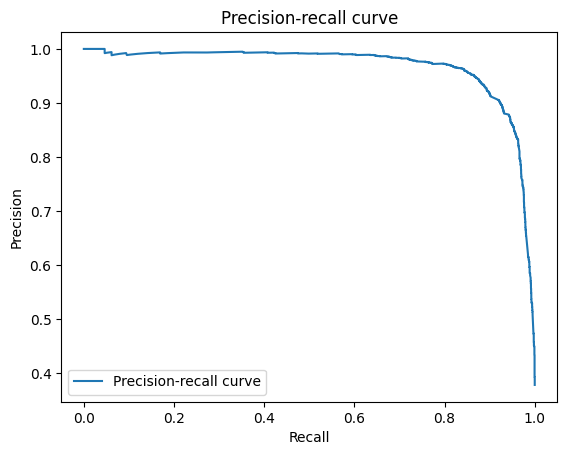

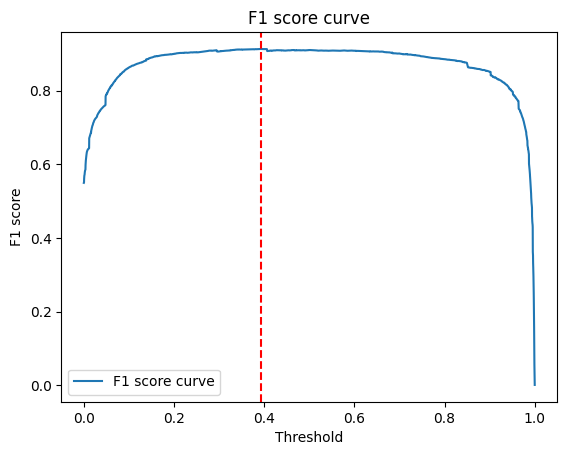

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt

# assuming y_true and y_pred are the true and predicted binary labels
fpr, tpr, thresholds_roc = roc_curve( y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

precision, recall, thresholds_pr = precision_recall_curve( y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

# calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
#plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()

# plot F1 score curve
plt.plot(thresholds_pr, f1_scores[:-1], label='F1 score curve')
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
y_train_predict_final["Final_prediction"]=y_train_predict_final.Converted_prob.map(lambda x:1 if x>0.4 else 0)

In [ ]:
y_train_predict_final.head()

,Converted,Converted_prob,Customer_ID,Final_prediction
0,0,0.067183,6234,0
1,0,0.780238,6770,1
2,1,0.984077,5319,1
3,0,0.002556,7946,0
4,0,0.138453,5431,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Converted'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Converted_prob'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Customer_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Final_prediction'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Converted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Converted_prob'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Customer_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Final_prediction'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Converted', 'Converted_prob'], ['Converted_prob', 'Customer_ID'], ['Customer_ID', 'Final_prediction']]], **{})
chart

In [ ]:
y_train_predict_final["enquiry_score"]=y_train_predict_final.Converted_prob.map(lambda x: round(x*100))

In [ ]:
y_train_predict_final.head()

,Converted,Converted_prob,Customer_ID,Final_prediction,enquiry_score
0,0,0.067183,6234,0,7
1,0,0.780238,6770,1,78
2,1,0.984077,5319,1,98
3,0,0.002556,7946,0,0
4,0,0.138453,5431,0,14


In [ ]:
# lets segregate the clients or enquiry: hot,cold,potential

In [ ]:
def decide_enquiry_quality(probability,hot_threshold=0.70,cold_threshold=0.30):
  if probability>=hot_threshold:
    return "Most imp enquiry"

  elif probability<cold_threshold:
    return "COLD CASE"

  else:
    return "POTENTIAL CLIENT"


In [ ]:
y_train_predict_final["Enquiry quality"]=y_train_predict_final["Converted_prob"].apply(decide_enquiry_quality)

In [ ]:
y_train_predict_final

,Converted,Converted_prob,Customer_ID,Final_prediction,enquiry_score,Enquiry quality
0,0,0.067183,6234,0,7,COLD CASE
1,0,0.780238,6770,1,78,Most imp enquiry
2,1,0.984077,5319,1,98,Most imp enquiry
3,0,0.002556,7946,0,0,COLD CASE
4,0,0.138453,5431,0,14,COLD CASE
...,...,...,...,...,...,...
7253,0,0.003858,1960,0,0,COLD CASE
7254,1,0.406078,5869,1,41,POTENTIAL CLIENT
7255,0,0.015785,8109,0,2,COLD CASE
7256,1,0.990159,3165,1,99,Most imp enquiry


In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
print(classification_report(y_train_predict_final.Converted,y_train_predict_final.Final_prediction))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4510
           1       0.91      0.92      0.91      2748

    accuracy                           0.93      7258
   macro avg       0.93      0.93      0.93      7258
weighted avg       0.93      0.93      0.93      7258



In [ ]:
# TESTING SET

In [ ]:
# Recurssive Feature elimination
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [ ]:
rfe.support_

array([False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False])

In [ ]:
col=x_test.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_No comments',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [ ]:
x_test.columns[~rfe.support_]

Index(['const', 'Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted 

In [ ]:
x_train_sm=sm.add_constant(x_train[col])
log_model2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
result=log_model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7258
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1280.6
Date:                Sun, 03 Sep 2023   Deviance:                       2561.1
Time:                        14:36:47   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6224
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1056      0.214    -19.197      0.000      -4.525      -3.686
Total Time Spent on Website                  3.6090      0.220     16.441      0.000       3.179       4.039
Lead Origin_Lead Add Form                    1.0613      0.412      2.574      0.010       0.253       1.869
Lead Source_Welingak Website                 2.2922      0.839      2.731      0.006       0.647       3.937
Last Activity_Had a Phone Conversation       4.7094      1.265      3.723      0.000       2.230       7.189
Last Activity_SMS Sent                       2.1108      0.117     17.982      0.000       1.881       2.341
What is your current occupation_other       -2.6048      0.145    -17.971      0.000      -2.889      -2.321
Tags_Busy                                    2.4165      0.278      8.687      0.000       1.871       2.962
Tags_Closed by Horizzon                      8.5887      0.760     11.308      0.000       7.100      10.077
Tags_Lost to EINS                            8.8460      0.588     15.045      0.000       7.694       9.998
Tags_No comments                             3.7254      0.228     16.363      0.000       3.279       4.172
Tags_Ringing                                -1.5041      0.281     -5.357      0.000      -2.054      -0.954
Tags_Will revert after reading the email     6.3266      0.253     25.033      0.000       5.831       6.822
Tags_switched off                           -2.2468      0.627     -3.582      0.000      -3.476      -1.018
Lead Quality_Worst                          -2.1058      0.673     -3.129      0.002      -3.425      -0.787
Last Notable Activity_Modified              -1.4480      0.123    -11.801      0.000      -1.688      -1.208
============================================================================================================
"""

In [ ]:
x_test_sm=sm.add_constant(x_test[col])
# get the probability score
y_test_predict=result.predict(x_test_sm)
y_test_predict

4163    0.987025
9222    0.962525
8395    0.994488
7686    0.862780
5956    0.849483
          ...   
7965    0.128371
496     0.014461
4000    0.348483
5747    0.980004
4274    0.213424
Length: 1815, dtype: float64

In [ ]:
# another approach
logreg.fit(x_train_sm,y_train)

LogisticRegression()

In [ ]:
probability_score=logreg.predict_proba(x_test_sm)
probability_score

array([[0.01742461, 0.98257539],
       [0.0444996 , 0.9555004 ],
       [0.02267081, 0.97732919],
       ...,
       [0.65327696, 0.34672304],
       [0.0261291 , 0.9738709 ],
       [0.78357599, 0.21642401]])

In [ ]:
pos_probability_score=logreg.predict_proba(x_test_sm)[:,1]
pos_probability_score

array([0.98257539, 0.9555004 , 0.97732919, ..., 0.34672304, 0.9738709 ,
       0.21642401])

continute with OLS

In [ ]:
y_test_predict=y_test_predict.values.reshape(-1)
y_test_predict

array([0.98702529, 0.96252457, 0.99448847, ..., 0.34848278, 0.98000394,
       0.21342364])

In [ ]:
y_test_predict_final=pd.DataFrame({"Converted":y_test.values,"Converted_prob":y_test_predict})
y_test_predict_final["Customer_ID"]=y_test.index
y_test_predict_final.head(10)

,Converted,Converted_prob,Customer_ID
0,1,0.987025,4163
1,0,0.962525,9222
2,1,0.994488,8395
3,1,0.862780,7686
4,1,0.849483,5956
5,0,0.005744,45
6,0,0.083501,1945
7,0,0.006740,1177
8,1,0.991697,3691
9,0,0.003564,7568


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['Converted'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['Converted_prob'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['Customer_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_12, *['Converted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['Converted_prob'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['Customer_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_15, *[[['Converted', 'Converted_prob'], ['Converted_prob', 'Customer_ID']]], **{})
chart

In [ ]:
# roc,threshold value

In [ ]:
from sklearn.metrics import roc_curve,precision_recall_curve,f1_score,auc

In [ ]:
fpr,tpr,thresholds_roc=roc_curve(y_test_predict_final.Converted,y_test_predict_final.Converted_prob)

In [ ]:
precision,recall,threshold_pr=precision_recall_curve(y_test_predict_final.Converted,y_test_predict_final.Converted_prob)

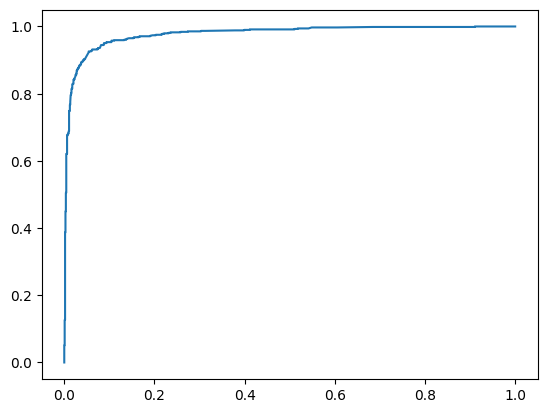

In [ ]:
plt.plot(fpr,tpr,label="Roc Curve(area=%0.2f)" % auc(fpr,tpr))

In [ ]:
f1_scores=2*(precision*recall)/(precision+recall)
optimal_idx=np.argmax(f1_scores)
optimal_threshold=threshold_pr[optimal_idx]

In [ ]:
optimal_threshold

0.40117716010612475

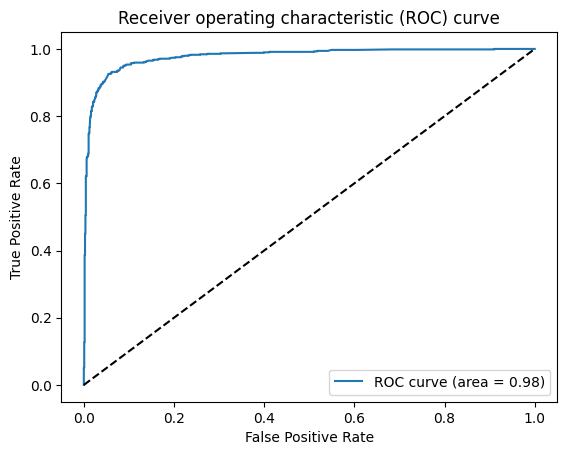

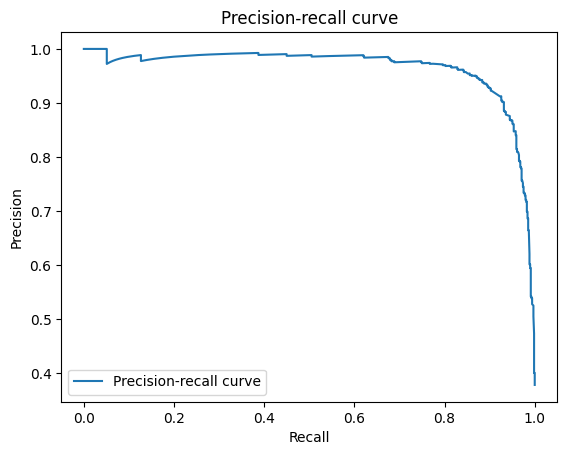

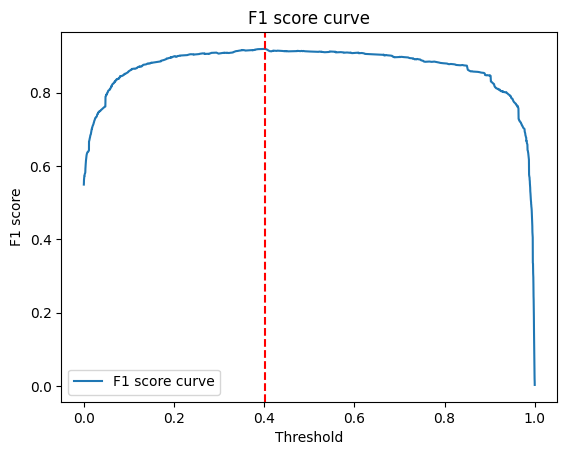

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt

# assuming y_true and y_pred are the true and predicted binary labels
fpr, tpr, thresholds_roc = roc_curve( y_test_predict_final.Converted, y_test_predict_final.Converted_prob)

precision, recall, thresholds_pr = precision_recall_curve( y_test_predict_final.Converted, y_test_predict_final.Converted_prob)

# calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
#plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()

# plot F1 score curve
plt.plot(thresholds_pr, f1_scores[:-1], label='F1 score curve')
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
y_test_predict_final["Final_prediction"]=y_test_predict_final.Converted_prob.map(lambda x:1 if x>0.4 else 0)

In [ ]:
y_test_predict_final.head()

,Converted,Converted_prob,Customer_ID,Final_prediction
0,1,0.987025,4163,1
1,0,0.962525,9222,1
2,1,0.994488,8395,1
3,1,0.862780,7686,1
4,1,0.849483,5956,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_16, *['Converted'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_17, *['Converted_prob'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['Customer_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['Converted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_20, *['Converted_prob'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_21, *['Customer_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_22, *[[['Converted', 'Converted_prob'], ['Converted_prob', 'Customer_ID']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_23, *['Final_prediction', 'Converted', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_24, *['Final_prediction', 'Converted_prob', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_25, *['Final_prediction', 'Customer_ID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_26, *['Final_prediction', 'count()', None], **{})
chart

In [ ]:
y_test_predict_final["enquiry_score"]=y_test_predict_final.Converted_prob.map(lambda x: round(x*100))

In [ ]:
def decide_enquiry_quality(probability,hot_threshold=0.70,cold_threshold=0.30):
  if probability>=hot_threshold:
    return "Most imp enquiry"

  elif probability<cold_threshold:
    return "COLD CASE"

  else:
    return "POTENTIAL CLIENT"


In [ ]:
y_test_predict_final["Enquiry quality"]=y_test_predict_final["Converted_prob"].apply(decide_enquiry_quality)

In [ ]:

from sklearn.metrics import classification_report,accuracy_score


In [ ]:
print(classification_report(y_test_predict_final.Converted,y_test_predict_final.Final_prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1128
           1       0.91      0.93      0.92       687

    accuracy                           0.94      1815
   macro avg       0.93      0.94      0.93      1815
weighted avg       0.94      0.94      0.94      1815



# Conclusion: Predicting Lead Conversion for Business Growth

In this project, we aimed to assist a business in optimizing its lead conversion process by leveraging machine learning techniques. By analyzing historical data and building a logistic regression model, we have generated valuable insights into lead conversion likelihood and identified critical factors influencing conversions.



# Key Findings and Insights:

**1. Model Performance:** Our logistic regression model demonstrates excellent performance in predicting lead conversion. With an accuracy of approximately 94% on the test data, the model provides a strong foundation for decision-making.

**2. Feature Importance:** Through feature selection techniques, we identified 15 key features that significantly influence lead conversion. These include factors such as "Total Time Spent on Website," "Lead Origin," "Lead Source," "Last Activity," "Tags," "Lead Quality," and "Last Notable Activity."

**3. Optimal Threshold:** To maximize the F1 score, we determined an optimal threshold for lead classification at approximately 0.4012. This threshold balances precision and recall and can be used to make decisions on lead prioritization.

**4. Visualization:** ROC curves, precision-recall curves, and F1 score curves were used to visualize the model's performance, allowing stakeholders to understand the trade-offs between different evaluation metrics.

**5. Lead Quality Categories:** We introduced "Enquiry quality" categories, enabling easy categorization of leads into "Most important enquiry," "Cold case," or "Potential client" based on their conversion probabilities.


# Business Implications and Recommendations:

**1. Resource Allocation:** By prioritizing leads with high conversion probabilities (above the optimal threshold), sales and marketing teams can focus their efforts on the most promising prospects. This will lead to higher conversion rates and resource efficiency.

**2. Lead Engagement Strategies:** Insights from the model suggest that specific lead sources, activities, and tags significantly affect conversion. Tailoring engagement strategies based on these insights can improve lead nurturing and follow-up.

**3. Marketing Campaigns:** Identifying factors that contribute to lead conversion, such as "Last Notable Activity," can help refine marketing campaigns and messaging to resonate better with potential clients.

**4. Continuous Monitoring:** The model should be regularly updated with new data to adapt to changing market dynamics and customer behaviors. Periodic evaluation of model performance is essential for maintaining accuracy.



# Conclusion:

In conclusion, our lead conversion prediction project offers valuable insights and tools to enhance a business's lead management processes. By employing machine learning techniques, we can prioritize leads effectively, optimize resource allocation, and improve overall conversion rates. This data-driven approach empowers businesses to make informed decisions, reduce marketing costs, and drive revenue growth.

With the implementation of our model's recommendations, businesses can expect to see tangible improvements in lead conversion rates and a more efficient allocation of sales and marketing resources. This project underscores the power of data-driven decision-making in achieving business success.

